In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np
from scipy import stats
from textwrap import wrap
from matplotlib.font_manager import FontProperties
import re
from scipy import stats
from matplotlib.lines import Line2D 

line_size=0.5
custom_params = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    "axes.spines.right": True, 
    "axes.spines.bottom": True,
    'xtick.direction': 'inout',
    'ytick.direction': 'in',
    'xtick.bottom': True,
    'xtick.minor.visible': False,
    'xtick.major.bottom':  True,
    'xtick.minor.bottom':  True,
    'xtick.major.pad':     7,     # distance to major tick label in points#
    'xtick.minor.pad':     3.4,     # distance to the minor tick label in points#
    'xtick.major.size':    10,
    'ytick.major.size':    4,
    'xtick.major.width':   line_size,
    'ytick.major.width':   line_size,
    'axes.linewidth': line_size,
    'xtick.minor.size':    2,
    'pdf.fonttype': 42}

plt.rcParams.update(custom_params)
sns.set_theme(style="ticks", rc=custom_params, font="Arial",font_scale=0.7)

enmax_palette = ["#648FFF", "#FE6100", "#785EF0", "#DC267F", "#FFB000"]
sns.set_palette(palette=enmax_palette)

2.6


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


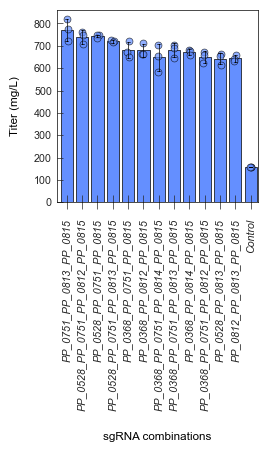

In [2]:
# Define the filename
filename = "250228_Best_Performers_Isoprenol.csv"

# Load the CSV file into a dataframe
df = pd.read_csv(f'Figure_Data/{filename}')

# Define the figure name
fig = "Best_performing_combos"
data = df.copy()

# Group by "Line Name" and calculate the mean "Isoprenol" values
grouped_data = data.groupby("Line Name")["Isoprenol"].mean().reset_index()

# Sort the grouped data by mean "Isoprenol" in descending order and select the top 10
top10_grouped = grouped_data.sort_values(by="Isoprenol", ascending=False).head(12)

# Ensure the "Control" group is included
control_group = grouped_data[grouped_data["Line Name"] == "Control"]
if not control_group.empty:
    top10_grouped = pd.concat([top10_grouped, control_group]).drop_duplicates().reset_index(drop=True)

# Filter the original data to include only the selected groups
top10_data = data[data["Line Name"].isin(top10_grouped["Line Name"])]

# Sort the selected data by "Isoprenol" in descending order
top10_data = top10_data.sort_values(by="Isoprenol", ascending=False)

# Set the color palette to a single color (e.g., blue)
single_color = "#648FFF"
sns.set_palette([single_color])

w = len(top10_grouped) / 5  # Adjust the width of the plot based on the number of bars
print(w)
plt.figure(figsize=(w, 2.5))

# Plot stripplot overlaid on a barplot
with sns.color_palette([single_color]):
    ax = sns.stripplot(
        data=top10_data, x="Line Name", 
        y="Isoprenol", 
        dodge=True, alpha=0.7, linewidth=line_size, edgecolor="0", zorder=2, color=single_color)

    ax = sns.barplot(
        data=top10_data, x="Line Name", 
        y="Isoprenol", 
        errorbar="sd", zorder=0, capsize=0.2, 
        err_kws={'color': '0', 'linewidth': line_size},
        linewidth=line_size, edgecolor="0", ax=ax, saturation=1, color=single_color)
    legend_handles, labels = ax.get_legend_handles_labels()

# Format axes and legend
plt.xlabel('sgRNA combinations', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)
# plt.legend(legend_handles, ['_','_','Non-Target','Target'], loc='upper right')

plt.ylim(0,)
plt.xticks(rotation='vertical', style='italic')

ax.set_xlim(-0.65, None)

plt.savefig(f'Figure_Export\\{fig}.pdf', dpi=1200, bbox_inches='tight')
plt.show()